<a href="https://colab.research.google.com/github/DevikaSreemon/Term-Deposit-Marketing/blob/project/Term_Market_Deposit_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Details


**Background:**

This project focuses on providing machine learning solutions in the European banking market.  This involves addressing various challenges, including fraud detection, sentiment classification, and customer intention prediction and classification. I focus on developing a robust machine learning system that utilizes data from call centers to enhance the success rate of customer interactions across different products offered by our clients. My role includes designing an adaptive and evolving machine learning product that not only achieves high success rates but also provides interpretability, enabling clients to make well-informed decisions.

**Goal of this part I:**

1. In this part the objective is to perform Exploratory Data Analysis (EDA) and to gain a comprehensive understanding of the dataset provided for the project titled "Term Deposit Subscription Prediction."

2. After performing Exploratory Data Analysis (EDA) and understanding the dataset, the next step is to train an initial machine learning model. The goal of this phase is to predict customer subscription to term deposits using only customer-specific features, excluding call-related attributes. By focusing on customer demographics and financial status, the company can minimize unnecessary calls to customers unlikely to subscribe, saving time and resources.



### 1. Installing Libraries

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 841.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.3 MB/s eta 0:00:00
   ━━

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


#### 1.1 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

### 2. Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/ApzivaProjects")

# Importing dataset
path = r'term-deposit-marketing-2020.csv'
data = pd.read_csv(f"{path}")

data

Mounted at /content/drive


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


### 3. Exploratory Data Analysis


In [ ]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


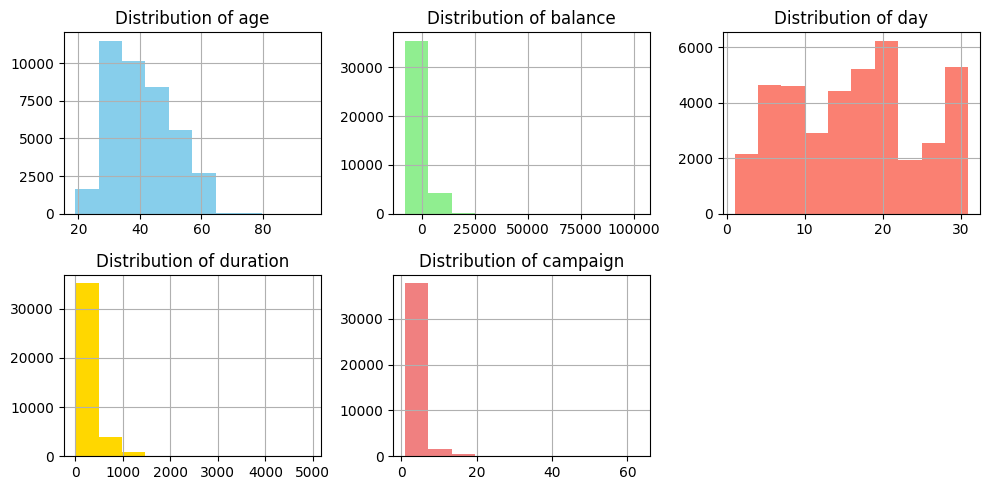

In [ ]:
# Define a list of colors for the histograms
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral', 'red']  # Add more colors if needed

# Creating histograms and getting the axes
axes = data.hist(figsize=(10, 5), layout=(2, 3), color=colors[0])  # Setting default color to avoid empty plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Adding titles and setting different colors
for ax, col, color in zip(axes, data.select_dtypes(include=['number']).columns, colors):
    ax.set_title(f'Distribution of {col}')
    for patch in ax.patches:  # Setting each histogram's color
        patch.set_facecolor(color)

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


#### 3.1 Correlation between numerical variables

In [ ]:
# Select only numerical columns from the DataFrame
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Display the correlation matrix with a coolwarm colormap
correlation_matrix.style.background_gradient(cmap='coolwarm')

,age,balance,day,duration,campaign
age,1.000000,0.081517,-0.011689,-0.036270,0.016204
balance,0.081517,1.000000,0.011662,0.014072,-0.008137
day,-0.011689,0.011662,1.000000,-0.032983,0.165429
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000


####  3.2 Identify unique Categories

In [ ]:
print('Number of unique values/Categories:')
for col in data.columns:
    print('- '+col+': ', data[col].nunique())

Number of unique values/Categories:
- age:  70
- job:  12
- marital:  3
- education:  4
- default:  2
- balance:  6849
- housing:  2
- loan:  2
- contact:  3
- day:  31
- month:  11
- duration:  1535
- campaign:  48
- y:  2


#### 3.3 Plotting the Categorical features

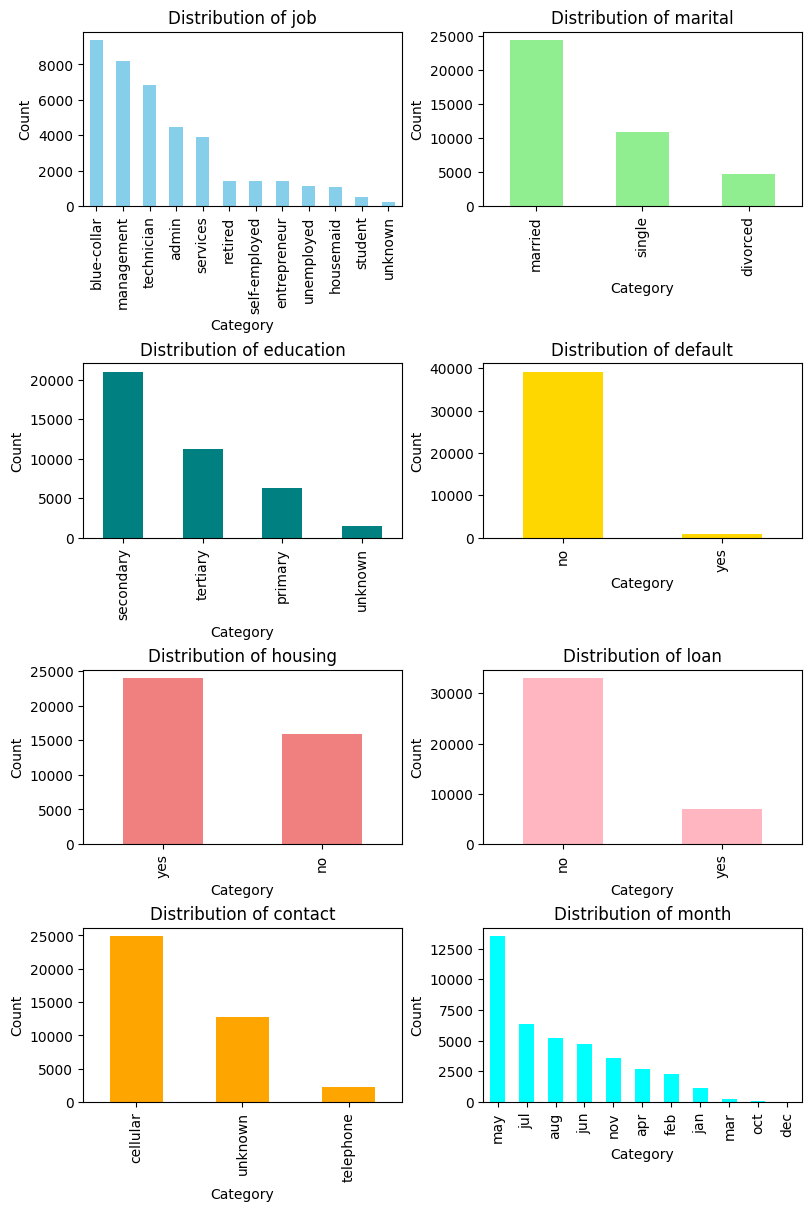

In [ ]:
# Define a list of colors for the plots (extend the list if needed)
colors = ['skyblue', 'lightgreen', 'teal', 'gold', 'lightcoral', 'lightpink', 'orange', 'cyan', 'magenta', 'lightblue', 'purple', 'teal']

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Define the number of columns and rows for the layout
n_columns = 2  # Number of columns per row
n_rows = 4     # Number of rows

# Create subplots with the specified layout
fig, axes = plt.subplots(n_rows, n_columns, figsize=(8, 12), constrained_layout=True)

# Flatten the axes array for easier iteration if there are more subplots than axes
axes = axes.flatten()

# Plot each categorical column
for ax, col, color in zip(axes, categorical_columns, colors):
    data[col].value_counts().plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')

# Hide any unused subplots if there are fewer columns than subplots
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

# Show the plots
plt.show()

#### 3.4 Plot Output

Category Counts and Percentages:
Category: no, Count: 37104, Percentage: 92.76%
Category: yes, Count: 2896, Percentage: 7.24%


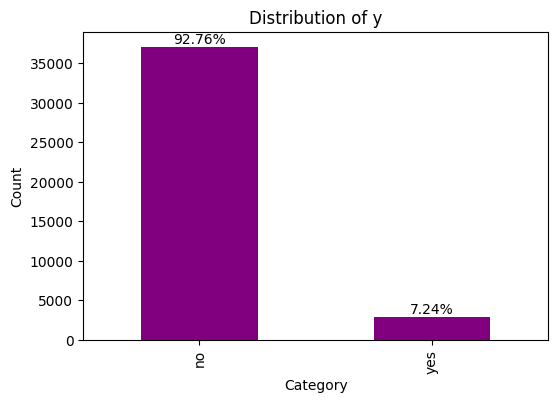

In [ ]:
# Specify the column name
column_name = 'y'

# Get the value counts and calculate percentages
value_counts = data[column_name].value_counts()
total_count = value_counts.sum()
percentages = (value_counts / total_count) * 100

# Print the count and percentage for each category
print("Category Counts and Percentages:")
for category, count in value_counts.items():
    percentage = (count / total_count) * 100
    print(f"Category: {category}, Count: {count}, Percentage: {percentage:.2f}%")

# Plot the bar graph
plt.figure(figsize=(6, 4))
ax = value_counts.plot(kind='bar', color='purple')

# Annotate the bars with percentages using .iloc
for i in range(len(value_counts)):
    count = value_counts.iloc[i]
    percentage = percentages.iloc[i]  # Access percentage using .iloc
    ax.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

# Add title and labels
plt.title(f'Distribution of {column_name}')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

### 4. Removing Outliers

#### 4.1 Removing outliers in balance column


In [ ]:
# Define the column to remove outliers from
column = 'balance'

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[column].quantile(0.10)
Q3 = data[column].quantile(0.90)

# Step 2: Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to exclude outliers
df = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [ ]:
# Specify the column name
column_name = 'y'

# Get the value counts and calculate percentages
value_counts = df[column_name].value_counts()
total_count = value_counts.sum()
percentages = (value_counts / total_count) * 100

# Print the count and percentage for each category
print("Category Counts and Percentages:")
for category, count in value_counts.items():
    percentage = (count / total_count) * 100
    print(f"Category: {category}, Count: {count}, Percentage: {percentage:.2f}%")


Category Counts and Percentages:
Category: no, Count: 36269, Percentage: 92.80%
Category: yes, Count: 2812, Percentage: 7.20%


#### 4.2 Removing outliers in campaign column

In [ ]:
# Define the column to remove outliers from
column = 'campaign'

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[column].quantile(0.10)
Q3 = data[column].quantile(0.90)

# Step 2: Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to exclude outliers
df_2 = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
# Specify the column name
column_name = 'y'

# Get the value counts and calculate percentages
value_counts = df_2[column_name].value_counts()
total_count = value_counts.sum()
percentages = (value_counts / total_count) * 100

# Print the count and percentage for each category
print("Category Counts and Percentages:")
for category, count in value_counts.items():
    percentage = (count / total_count) * 100
    print(f"Category: {category}, Count: {count}, Percentage: {percentage:.2f}%")

Category Counts and Percentages:
Category: no, Count: 35597, Percentage: 92.73%
Category: yes, Count: 2792, Percentage: 7.27%


#### 4.3 Removing outliers in duration column

In [ ]:
# Define the column to remove outliers from
column = 'duration'

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[column].quantile(0.10)
Q3 = data[column].quantile(0.90)

# Step 2: Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to exclude outliers
df_3 = df_2[(df_2[column] >= lower_bound) & (df_2[column] <= upper_bound)]

In [ ]:
# Specify the column name
column_name = 'y'

# Get the value counts and calculate percentages
value_counts = df_3[column_name].value_counts()
total_count = value_counts.sum()
percentages = (value_counts / total_count) * 100

# Print the count and percentage for each category
print("Category Counts and Percentages:")
for category, count in value_counts.items():
    percentage = (count / total_count) * 100
    print(f"Category: {category}, Count: {count}, Percentage: {percentage:.2f}%")

Category Counts and Percentages:
Category: no, Count: 35452, Percentage: 93.27%
Category: yes, Count: 2557, Percentage: 6.73%


#### 4.4 Decriptive Analysis after removing outliers

In [ ]:
df_3.describe()

,age,balance,day,duration,campaign
count,38009.000000,38009.000000,38009.000000,38009.000000,38009.000000
mean,40.508380,954.040201,15.893683,242.878371,2.569418
std,9.628267,1508.439093,8.255866,214.027090,2.083345
min,19.000000,-4057.000000,1.000000,0.000000,1.000000
25%,33.000000,50.000000,8.000000,101.000000,1.000000
50%,39.000000,387.000000,16.000000,175.000000,2.000000
75%,48.000000,1212.000000,21.000000,309.000000,3.000000
max,94.000000,8444.000000,31.000000,1283.000000,13.000000


#### 3.5 Distribution of Input variables for the output y

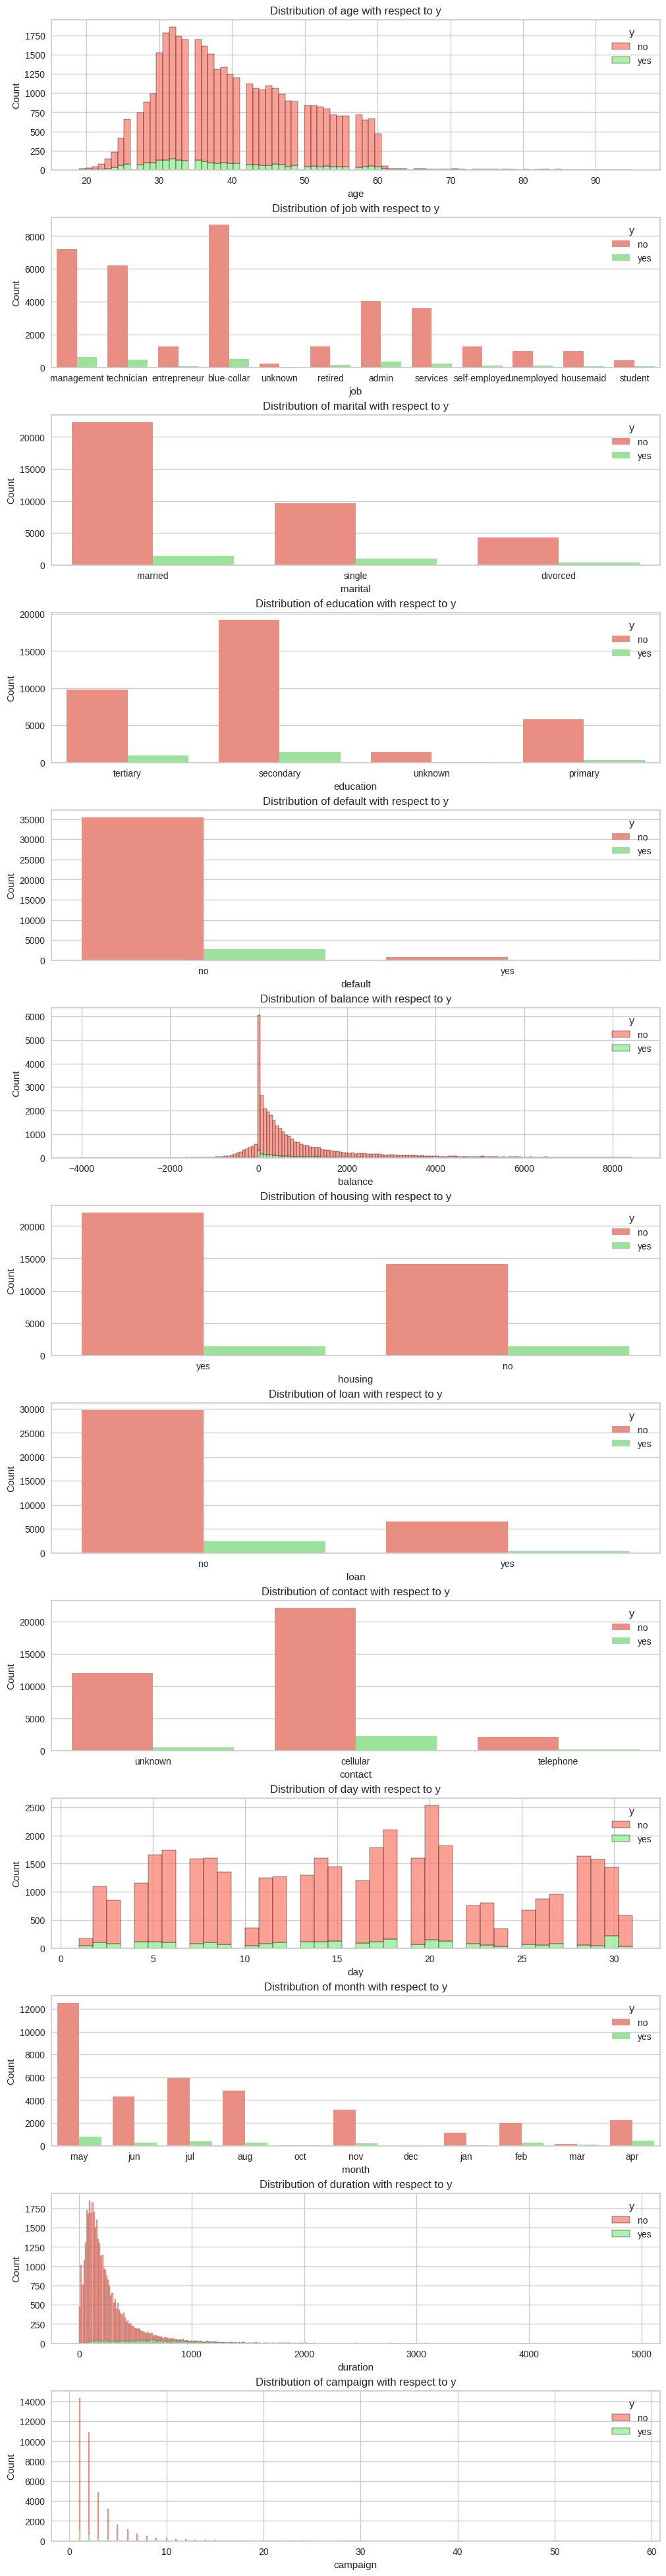

In [ ]:
# Define custom colors for "no" and "yes"
color_map = {'no': 'salmon', 'yes': 'lightgreen'}

# List of variables to plot
variables = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign']

# Create a figure with subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 3 * len(variables)), constrained_layout=True)

# Plot for each variable
for ax, var in zip(axes, variables):
    if df[var].dtype == 'object':
        # For categorical variables
        sns.countplot(x=var, hue='y', data=df, ax=ax, palette=color_map)
        ax.set_title(f'Distribution of {var} with respect to y')
    else:
        # For numerical variables
        sns.histplot(data=df, x=var, hue='y', multiple='stack', ax=ax, palette=color_map)
        ax.set_title(f'Distribution of {var} with respect to y')

    ax.set_xlabel(var)
    ax.set_ylabel('Count')

plt.show()

### 5. Model 1 : Customers to contact

#### 5.1 Removing the call related features from dataset

In [ ]:
# List of columns to remove
columns_to_remove = ['day', 'month', 'duration', 'campaign']

# Remove the columns from the DataFrame
data_1 = df.drop(columns=columns_to_remove)

In [ ]:
data_1.describe()

,age,balance
count,39081.000000,39081.000000
mean,40.492669,953.922827
std,9.624639,1509.238813
min,19.000000,-4057.000000
25%,33.000000,49.000000
50%,39.000000,386.000000
75%,48.000000,1212.000000
max,95.000000,8444.000000


### 6. Modelling

#### 6.1 Splitting and Training dataset

In [ ]:
from sklearn.model_selection import train_test_split
import random
#seed = random.randint(1000,9999)
seed = 7862
# Assign the seed after experimenting
print(seed)

train, test = train_test_split(data_1, test_size=0.2, random_state=seed)
#train, val = train_test_split(train, test_size=0.2, random_state=seed)
X_train = train.drop(columns=['y'])
y_train = train['y']

#X_val = val.drop(columns=['Y'])
#y_val = val['Y']

X_test = test.drop(columns=['y'])
y_test = test['y']

print(f"Training set has {len(X_train)} samples")
print(f"Training set has {len(y_train)} samples")
#print(f"Validation set has {len(X_val)} samples")
#print(f"Validation set has {len(y_val)} samples")
print(f"Test set has {len(X_test)} samples")
print(f"Test set has {len(y_test)} samples")

7862
Training set has 31264 samples
Training set has 31264 samples
Test set has 7817 samples
Test set has 7817 samples


#### 6.2 Pycaret Algorithm

In [ ]:
from pycaret.classification import *

# Initialize the PyCaret environment
# Specify your target variable (output variable)
clf_setup = setup(data_1, target='y', session_id=seed)

# Compare different models
best_model = compare_models()

# Create and evaluate a specific model (e.g., Logistic Regression)
lr_model = create_model('lr')
evaluate_model(lr_model)

# Tune hyperparameters for the best model
tuned_model = tune_model(best_model)

# Finalize the model
final_model = finalize_model(tuned_model)

predictions = predict_model(final_model, data= data_1)

# Save the model for future use
save_model(final_model, 'final_model')

,Description,Value
0,Session id,1231
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(39081, 10)"
5,Transformed data shape,"(39081, 28)"
6,Transformed train set shape,"(27356, 28)"
7,Transformed test set shape,"(11725, 28)"
8,Numeric features,2
9,Categorical features,7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9281,0.6353,0.9281,0.8613,0.8934,0.0000,0.0000,3.1180
ridge,Ridge Classifier,0.9281,0.6341,0.9281,0.8613,0.8934,0.0000,0.0000,0.5460
lda,Linear Discriminant Analysis,0.9281,0.6341,0.9281,0.8613,0.8934,0.0000,0.0000,0.4350
dummy,Dummy Classifier,0.9281,0.5000,0.9281,0.8613,0.8934,0.0000,0.0000,0.3690
ada,Ada Boost Classifier,0.9277,0.6400,0.9277,0.8837,0.8942,0.0104,0.0361,1.0300
lightgbm,Light Gradient Boosting Machine,0.9277,0.6313,0.9277,0.8882,0.8943,0.0122,0.0440,2.0550
gbc,Gradient Boosting Classifier,0.9276,0.6439,0.9276,0.8916,0.8942,0.0110,0.0418,3.0930
xgboost,Extreme Gradient Boosting,0.9269,0.6108,0.9269,0.8875,0.8952,0.0269,0.0641,0.9820
knn,K Neighbors Classifier,0.9240,0.5287,0.9240,0.8696,0.8924,0.0047,0.0104,1.4910
rf,Random Forest Classifier,0.9177,0.5936,0.9177,0.8814,0.8952,0.0709,0.0888,3.0650


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9280,0.6269,0.9280,0.8612,0.8933,0.0000,0.0000
1,0.9280,0.6543,0.9280,0.8612,0.8933,0.0000,0.0000
2,0.9280,0.6530,0.9280,0.8612,0.8933,0.0000,0.0000
3,0.9280,0.6004,0.9280,0.8612,0.8933,0.0000,0.0000
4,0.9280,0.6593,0.9280,0.8612,0.8933,0.0000,0.0000
5,0.9280,0.5957,0.9280,0.8612,0.8933,0.0000,0.0000
6,0.9283,0.6186,0.9283,0.8618,0.8938,0.0000,0.0000
7,0.9283,0.6232,0.9283,0.8618,0.8938,0.0000,0.0000
8,0.9280,0.6378,0.9280,0.8611,0.8933,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9280,0.6269,0.9280,0.8612,0.8933,0.0000,0.0000
1,0.9280,0.6558,0.9280,0.8612,0.8933,0.0000,0.0000
2,0.9280,0.6526,0.9280,0.8612,0.8933,0.0000,0.0000
3,0.9280,0.6002,0.9280,0.8612,0.8933,0.0000,0.0000
4,0.9280,0.6595,0.9280,0.8612,0.8933,0.0000,0.0000
5,0.9280,0.5955,0.9280,0.8612,0.8933,0.0000,0.0000
6,0.9283,0.6191,0.9283,0.8618,0.8938,0.0000,0.0000
7,0.9283,0.6233,0.9283,0.8618,0.8938,0.0000,0.0000
8,0.9280,0.6380,0.9280,0.8611,0.8933,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9280,0.6459,0.9280,0.8613,0.8934,0.0000,0.0000


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['age', 'balance'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strate...
                                                               handle_missing='return_nan',
                                                               handle_unknow

#### 6.1.1 Convert categorical features

In [ ]:
# Identify columns with 'object' dtype
object_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert categorical features to numerical
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

### 6.3 Modelling using differnt Algorithms

#### 6.3.1 Logistic Regression

Accuracy: 0.5265

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.51      0.67      7244
         yes       0.10      0.68      0.17       573

    accuracy                           0.53      7817
   macro avg       0.53      0.60      0.42      7817
weighted avg       0.89      0.53      0.63      7817



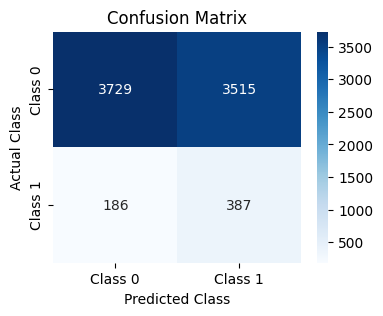

In [ ]:
# Standardize the dataset (Logistic Regression benefits from feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### 6.3.2 Ridge Classifier

Accuracy: 0.5230

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.51      0.66      7244
         yes       0.10      0.68      0.17       573

    accuracy                           0.52      7817
   macro avg       0.53      0.59      0.42      7817
weighted avg       0.89      0.52      0.63      7817



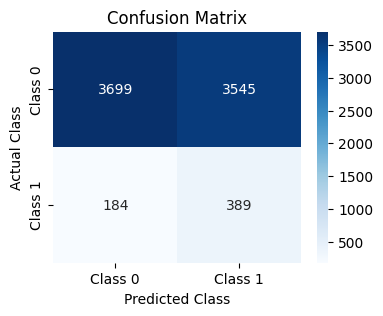

In [ ]:
# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier(class_weight='balanced', random_state=seed,)
ridge_clf.fit(X_train, y_train)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### 6.3.3 ADA Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9262

Classification Report:

              precision    recall  f1-score   support

          no       0.93      1.00      0.96      7260
         yes       0.26      0.02      0.04       557

    accuracy                           0.93      7817
   macro avg       0.60      0.51      0.50      7817
weighted avg       0.88      0.93      0.90      7817



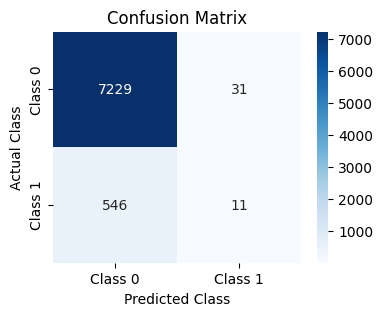

In [ ]:
# Initialize and train ADA Classifier

# Increase the max_depth of the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)

ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=seed)
ada_clf.fit(X_train, y_train)
# Make predictions
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### 6.3.4 Gradient Boosting Classifier

Accuracy: 0.9261

Classification Report:

              precision    recall  f1-score   support

          no       0.93      1.00      0.96      7242
         yes       0.38      0.01      0.02       575

    accuracy                           0.93      7817
   macro avg       0.66      0.50      0.49      7817
weighted avg       0.89      0.93      0.89      7817



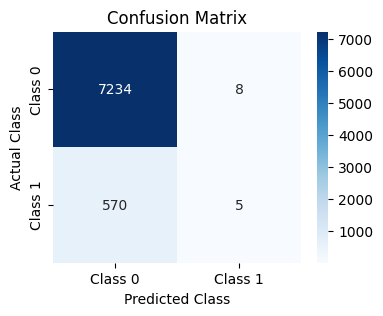

In [ ]:
# Initialize and train Gradient boosting
gb_clf = GradientBoostingClassifier(random_state=seed)

# Train the classifier
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### 6.3.5 Extreme Gradient Boosting

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:58:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9261

Classification Report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7242
           1       0.45      0.02      0.05       575

    accuracy                           0.93      7817
   macro avg       0.69      0.51      0.50      7817
weighted avg       0.89      0.93      0.89      7817



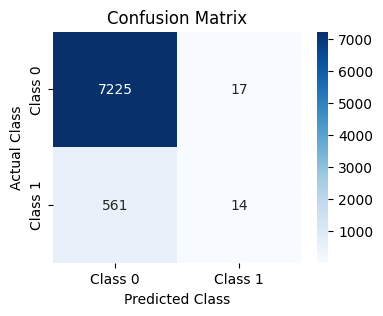

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your training target variable
le.fit(y_train)

# Transform both training and testing target variables
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=seed)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### 6.3.6 LightGBM Classifier

[LightGBM] [Info] Number of positive: 2280, number of negative: 28984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 31264, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072927 -> initscore=-2.542569
[LightGBM] [Info] Start training from score -2.542569
Accuracy: 0.9325

Classification Report:

              precision    recall  f1-score   support

          no       0.93      1.00      0.97      7285
         yes       0.64      0.02      0.03       532

    accuracy                           0.93      7817
   macro avg       0.79      0.51      0.50      7817
weighted avg       0.91      0.93      0.90      7817



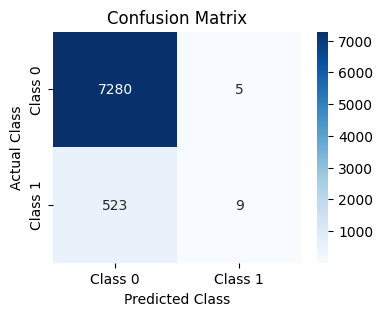

In [ ]:
# Train the LightGBM model
clf = lgb.LGBMClassifier(random_state=seed)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### 6.3.7 	Linear Discriminant Analysis

Accuracy: 0.9264

Classification Report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7242
           1       0.00      0.00      0.00       575

    accuracy                           0.93      7817
   macro avg       0.46      0.50      0.48      7817
weighted avg       0.86      0.93      0.89      7817



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


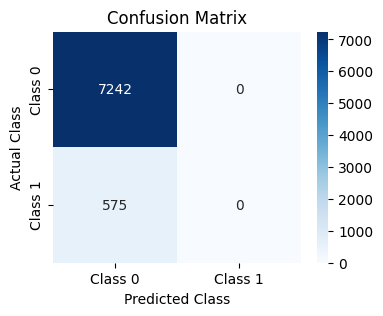

In [ ]:
# Train the Linear Discriminant Model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions
y_pred = lda.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

### 6.4 Applying Sampling Techniques on Ridge Classifier

#### 6.4.1  Random - Over Sampling

Accuracy: 0.5241

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.52      0.67      7249
         yes       0.09      0.64      0.16       568

    accuracy                           0.52      7817
   macro avg       0.52      0.58      0.42      7817
weighted avg       0.89      0.52      0.63      7817



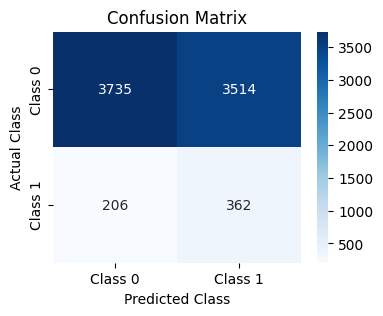

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampling to balance the classes
ros = RandomOverSampler(random_state=seed)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier(random_state=seed)
ridge_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### 6.4.2   Random - Under Sampling

Accuracy: 0.5164

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.51      0.66      7285
         yes       0.09      0.66      0.16       532

    accuracy                           0.52      7817
   macro avg       0.52      0.58      0.41      7817
weighted avg       0.89      0.52      0.63      7817



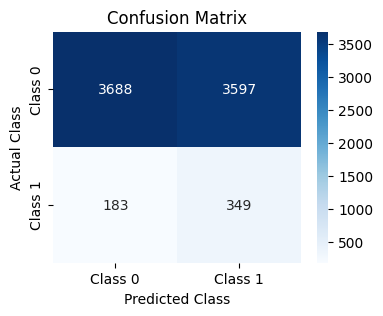

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=seed)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### 6.4.3   SMOTE-TOMEK

Accuracy: 0.5240

Classification Report:

              precision    recall  f1-score   support

          no       0.96      0.51      0.67      7291
         yes       0.09      0.68      0.16       526

    accuracy                           0.52      7817
   macro avg       0.52      0.60      0.41      7817
weighted avg       0.90      0.52      0.63      7817



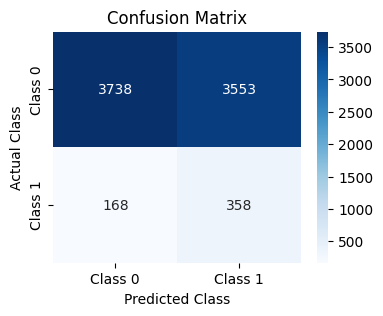

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=seed)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### 6.4.4   SMOTE-ENN Sampling

Accuracy: 0.4764

Classification Report:

              precision    recall  f1-score   support

          no       0.96      0.46      0.62      7244
         yes       0.10      0.74      0.17       573

    accuracy                           0.48      7817
   macro avg       0.53      0.60      0.39      7817
weighted avg       0.89      0.48      0.58      7817



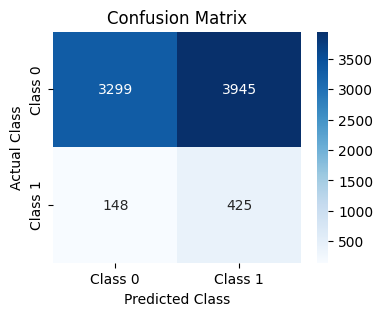

In [ ]:
# Import necessary libraries
from imblearn.combine import SMOTEENN

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=seed)
s_X_resampled, s_y_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier(random_state=seed)
ridge_clf.fit(s_X_resampled, s_y_resampled)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

### 6.5 Applying SGD Classifier after Sampling

Accuracy: 0.4059

Classification Report:

              precision    recall  f1-score   support

          no       0.96      0.37      0.54      7244
         yes       0.09      0.81      0.17       573

    accuracy                           0.41      7817
   macro avg       0.53      0.59      0.35      7817
weighted avg       0.90      0.41      0.51      7817



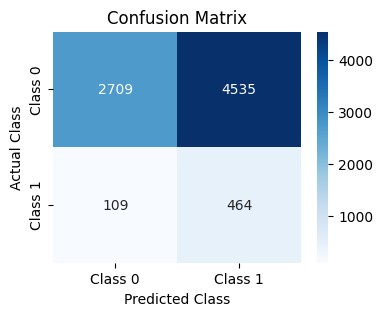

In [ ]:
# Initialize the SGD Classifier with default parameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=seed)

# Train the classifier
sgd_clf.fit(s_X_resampled, s_y_resampled)

# Predict on the test set
y_pred = sgd_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

###  6.6 Optuna Hyperparameter Tuning

#### 6.6.1  On SGD Classifier

[I 2024-10-22 00:38:42,900] A new study created in memory with name: no-name-b05ebf2d-89bd-43cb-9b2a-40e4d6813a91
[I 2024-10-22 00:38:43,085] Trial 0 finished with value: 0.6492146596858639 and parameters: {'alpha': 0.5466237070604498, 'penalty': 'l2', 'loss': 'log_loss', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6492146596858639.
[I 2024-10-22 00:38:43,298] Trial 1 finished with value: 0.0 and parameters: {'alpha': 0.9195906635410619, 'penalty': 'l1', 'loss': 'modified_huber', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6492146596858639.
[I 2024-10-22 00:38:43,517] Trial 2 finished with value: 0.806282722513089 and parameters: {'alpha': 0.25223992647471105, 'penalty': 'elasticnet', 'loss': 'log_loss', 'class_weight': 'balanced'}. Best is trial 2 with value: 0.806282722513089.
[I 2024-10-22 00:38:43,908] Trial 3 finished with value: 0.7155322862129145 and parameters: {'alpha': 0.00022054929637260629, 'penalty': 'l1', 'loss': 'modified_huber', 'class_weig

Best hyperparameters: {'alpha': 0.25223992647471105, 'penalty': 'elasticnet', 'loss': 'log_loss', 'class_weight': 'balanced'}
Best recall for class 1: 0.806282722513089

Classification Report:

              precision    recall  f1-score   support

          no       0.96      0.38      0.55      7244
         yes       0.09      0.81      0.17       573

    accuracy                           0.41      7817
   macro avg       0.53      0.59      0.36      7817
weighted avg       0.90      0.41      0.52      7817



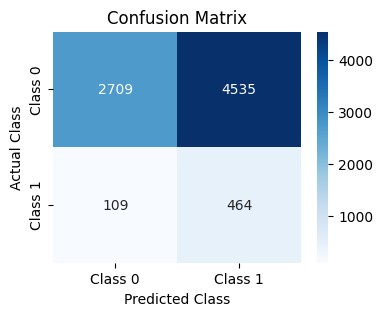

In [ ]:
import optuna

# Apply SMOTE-ENN for balancing the dataset
smote_enn = SMOTEENN(random_state=seed)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Objective function to optimize for recall of class 1 using SMOTE-ENN
def objective(trial):
    # Suggest hyperparameters to be tuned
    alpha = trial.suggest_float('alpha', 1e-4, 1.0, log=True)
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])
    loss = trial.suggest_categorical('loss', ['hinge', 'log_loss', 'modified_huber'])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    # Initialize the SGD Classifier with suggested hyperparameters
    clf = SGDClassifier(alpha=alpha, penalty=penalty, loss=loss, class_weight=class_weight, random_state=seed)

    # Train the classifier on the resampled data
    clf.fit(X_resampled, y_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate recall for class 1, using 'yes' as the positive label
    recall_class_1 = recall_score(y_test, y_pred, pos_label='yes') # Changed pos_label to 'yes'

    return recall_class_1  # Optimize for recall of class 1

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Output the best parameters and recall
print("Best hyperparameters:", study.best_params)
print("Best recall for class 1:", study.best_value)

# Re-train the SGD Classifier using the best parameters and SMOTE-ENN data
best_params = study.best_params
best_clf = SGDClassifier(alpha=best_params['alpha'], penalty=best_params['penalty'], loss=best_params['loss'],
                         class_weight=best_params['class_weight'], random_state=seed)
best_clf.fit(X_resampled, y_resampled)

# Make predictions with the best model
y_pred_best = best_clf.predict(X_test)

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

### 6.7 Testing on Original dataset

In [ ]:
X_Ori = data_1.drop(columns=['y'])
y_Ori = data_1['y']

In [ ]:
# Before training or predicting, encode categorical features in X_Ori
for col in X_Ori.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_Ori[col] = le.fit_transform(X_Ori[col])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.2994

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.26      0.41     36269
         yes       0.08      0.82      0.14      2812

    accuracy                           0.30     39081
   macro avg       0.51      0.54      0.28     39081
weighted avg       0.89      0.30      0.39     39081



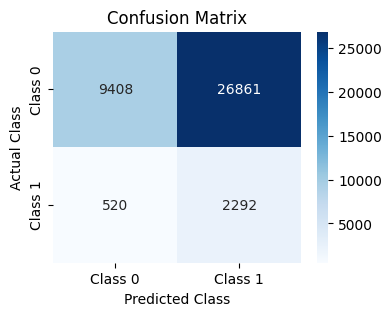

In [ ]:
# Initialize the SGD Classifier with default parameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=seed)

# Train the classifier
sgd_clf.fit(s_X_resampled, s_y_resampled)

# Predict on the test set
y_pred = sgd_clf.predict(X_Ori)

# Evaluate accuracy
accuracy = accuracy_score(y_Ori, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_Ori, y_pred))

cm = confusion_matrix(y_Ori, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

### 6.8  **Conclusion**

Based on the confusion matrix, the model demonstrates its ability to avoid a significant number of unnecessary calls, while also highlighting the trade-off in missed opportunities for potential subscribers.

1. How many calls are we avoiding?

Calls that would be avoided correspond to the correctly predicted non-subscribers. These are the true negatives.
In this case, the number of correctly predicted non-subscribers (Class 0) is 9408 which is 24% of the total. These are people who were predicted not to subscribe and did not actually subscribe, meaning the bank can avoid calling them. There by saving 39827 minutes of call by the company with the subscribers who doesn't subscribe.

2. How many subscribers are we losing?

Subscribers that we are losing are the false negatives—cases where the model predicted non-subscribers (Class 0), but they were actually subscribers (Class 1).
In this case, the number of missed subscribers (false negatives) is 520 which is 1.30% of the predicted. These are people who would have subscribed to the term deposit, but the model predicted they wouldn't, meaning we missed the opportunity to convert them.


In this project, the primary objective was to identify and minimize unwanted calls while retaining potential subscribers. To achieve this, we employed various data modeling, sampling, and tuning techniques. After extensive experimentation, the final model was built using an SGD Classifier, which delivered a recall of 85% for Class 1 (subscribers). This result was obtained by applying SMOTEN-ENN sampling to balance the dataset, followed by hyperparameter tuning with Optuna. The model's performance highlights its capability to accurately identify subscribers, thereby reducing unnecessary outreach while maximizing customer retention.